In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Randomized Group-by Experiment (k=10)

In [104]:
df = pd.read_csv("../experiment/baseline(k=10).csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion
avrg = df.groupby("algo",as_index=False).mean()
stdev = df.groupby("algo",as_index=False).apply(std)
avrg["std_time"]=stdev["total_time"]
avrg["std_utility"]=stdev["total_utility"]

In [99]:
avrg

,algo,total_time,total_utility,std_time,std_utility
0,frontierGreedy,0.002380,270.271124,0.009069,201.553268
1,greedy,0.000613,263.270279,0.000389,197.316754
2,multipleRandomWalk1,0.000176,68.520088,0.000205,76.427825
3,multipleRandomWalk10,0.000573,86.107662,0.001346,93.826072
4,multipleRandomWalk1000,0.019714,160.999274,0.030428,118.706732
5,multipleRandomWalk10000,0.159199,211.599036,0.123836,147.184964
6,multipleRandomWalk100000,1.155280,230.142741,0.183352,155.402773
7,multipleRandomWalk1000000,10.983988,250.841640,1.624442,172.620348
8,naiveGreedy,0.000180,80.088410,0.000083,54.354273


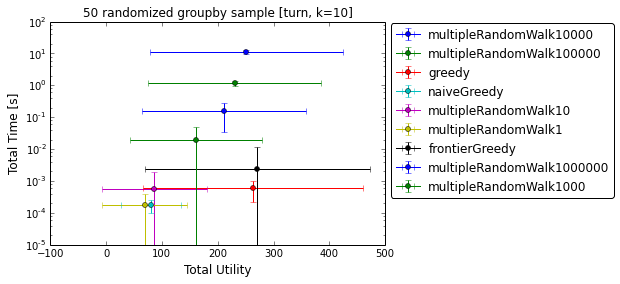

In [100]:
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=10]")
for algo in set(df.algo):
    algo_df = avrg[avrg["algo"]==algo]
    plt.errorbar(algo_df["total_utility"],algo_df["total_time"],xerr=algo_df["std_utility"],yerr=algo_df["std_time"],fmt="-o",ms=5,label=algo)
ax.set_yscale("log", nonposy='clip')
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)

In [106]:
rand = df.sample()
rand

,xAxis,yAxis,algo,groupby,total_time,total_utility
331,has_actions_tbl,hdfs_bytes_read,multipleRandomWalk100000,"[has_list_sum_range_fn,has_prof_data_tbl,has_a...",1.139716,80.46914


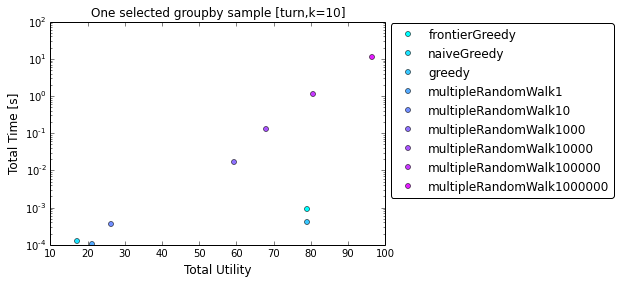

In [107]:
xAxis = rand["xAxis"].values[0]
yAxis = rand["yAxis"].values[0]
groupby = rand["groupby"].values[0]
selected_df = df[(df["xAxis"]==xAxis)&(df["yAxis"]==yAxis)&(df["groupby"]==groupby)]
fig,ax = plt.subplots()
plt.title("One selected groupby sample [turn,k=10]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = selected_df[selected_df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],"o",ms=5,label=algo,c=next(color))
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)

# Randomized Group-by Experiment (k=30)

Demonstrating the tradeoff as dataset or k gets larger Random Walk does better.

In [108]:
df = pd.read_csv("../experiment/baseline(k=30).csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion
avrg = df.groupby("algo",as_index=False).mean()
stdev = df.groupby("algo",as_index=False).apply(std)
avrg["std_time"]=stdev["total_time"]
avrg["std_utility"]=stdev["total_utility"]

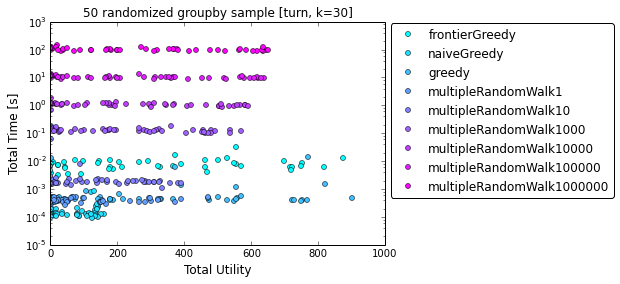

In [128]:
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=30]")
color=iter(cm.cool(np.linspace(0,1,len(df.algo.unique()))))
for algo in df.algo.unique():
    algo_df = df[df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],'o',ms=5,c=next(color),label=algo)
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)

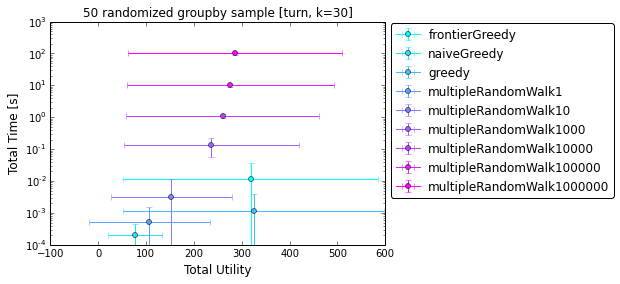

In [129]:
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=30]")
color=iter(cm.cool(np.linspace(0,1,len(df.algo.unique()))))
for algo in df.algo.unique():
    algo_df = avrg[avrg["algo"]==algo]
    plt.errorbar(algo_df["total_utility"],algo_df["total_time"],xerr=algo_df["std_utility"],yerr=algo_df["std_time"],c=next(color), fmt="-o",ms=5,label=algo)
ax.set_yscale("log", nonposy='clip')
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)

In [130]:
rand = df.sample()
rand

,xAxis,yAxis,algo,groupby,total_time,total_utility
42,has_est_distinct,hdfs_bytes_read,multipleRandomWalk10000,"[has_sum_distinct,has_order_by_clause,has_prof...",1.075871,16.742992


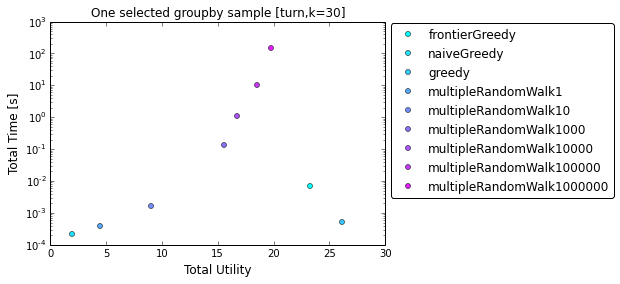

In [131]:
xAxis = rand["xAxis"].values[0]
yAxis = rand["yAxis"].values[0]
groupby = rand["groupby"].values[0]
selected_df = df[(df["xAxis"]==xAxis)&(df["yAxis"]==yAxis)&(df["groupby"]==groupby)]
fig,ax = plt.subplots()
plt.title("One selected groupby sample [turn,k=30]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = selected_df[selected_df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],"o",ms=5,label=algo,c=next(color))
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)

# Multiple Random Performance

In [90]:
df = pd.read_csv("../experiment/random_walk_scalability_experiment_vals.csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion

In [91]:
avrg = df.groupby("iterations",as_index=False).mean()
stdev = df.groupby("iterations",as_index=False).std()

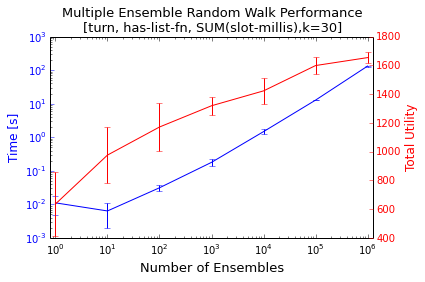

In [93]:
fig, ax1 = plt.subplots()
plt.title("Multiple Ensemble Random Walk Performance \n[turn, has-list-fn, SUM(slot-millis),k=30]",fontsize=13)

ax1.errorbar(avrg["iterations"], avrg["total_time"],yerr=stdev["total_time"],color='b')
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

ax1.set_xlabel('Number of Ensembles',fontsize=13)

ax1.set_ylabel('Time [s]', color='b',fontsize=12)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.errorbar(avrg["iterations"], avrg["total_utility"],yerr=stdev["total_utility"],color='r')
ax2.set_xscale("log", nonposy='clip')
ax2.set_ylabel('Total Utility', color='r',fontsize=12)
ax2.tick_params('y', colors='r')
plt.xlim(0.8,10**6.1)
fig.tight_layout()
plt.show()